# Q2 - Climate Projections

## Zuerich (47.37, 8.57)




In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr



C:\Users\Ronan\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Datasets:

We'll import six datasets.

These datasets are from either CNRM (CNRM is French research institute) or ICHEC (Irish Centre for High-End Computing).

We historical data from 1979 to 2006.

We then have predictions for two scenarios, rcp45 and rcp85. 

From Wikipedia:

RCP 4.5 is described by the IPCC as an intermediate scenario. RCP 4.5 is more likely than not to result in global temperature rise between 2 degrees C, and 3 degrees C, by 2100. Many plant and animal species will be unable to adapt to the effects of RCP 4.5 and higher RCP.

In RCP 8.5 emissions continue to rise throughout the 21st century. This is generally taken as the basis for the worst case climate change scenario.


In [6]:
#pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [7]:
hist_CNRM = xr.open_dataset('zuerich\\Zuerich_hist_RCA4_CNRM-CERFACS-CNRM-CM5.nc')   # historical predicted data from 1979 to 2005
hist_ICHEC = xr.open_dataset('zuerich\\Zuerich_hist_RCA4_ICHEC-EC-EARTH.nc')         # historical predicted data from 1979 to 2005
rcp45_CNRM = xr.open_dataset('zuerich\\Zuerich_rcp45_RCA4_CNRM-CERFACS-CNRM-CM5.nc') # intermediate case data predicted from 2040 to 2100
rcp45_ICHEC = xr.open_dataset('zuerich\\Zuerich_rcp45_RCA4_ICHEC-EC-EARTH.nc')       # intermediate case data predicted from 2040 to 2100
rcp85_CNRM = xr.open_dataset('zuerich\\Zuerich_rcp85_RCA4_CNRM-CERFACS-CNRM-CM5.nc') # worst case data predicted from 2040 to 2100
rcp85_ICHEC = xr.open_dataset('zuerich\\Zuerich_rcp85_RCA4_ICHEC-EC-EARTH.nc')       # worst case data predicted from 2040 to 2100

In [46]:
# concatenate the six datasets
ZuerichLatLon = np.array([47.37, 8.57])

TAS_hist_ALL = xr.concat([hist_CNRM.tas, hist_ICHEC.tas], 'origin')
TAS_proj_ALL = xr.concat([rcp45_CNRM.tas, rcp45_ICHEC.tas, rcp85_CNRM.tas, rcp85_ICHEC.tas], "origin")

TAS_hist_ALL = TAS_hist_ALL.sel(lat = ZuerichLatLon[0], lon = ZuerichLatLon[1], method = "nearest")
TAS_proj_ALL = TAS_proj_ALL.sel(lat = ZuerichLatLon[0], lon = ZuerichLatLon[1], method = "nearest")


hist_names = np.array(['hist_CNRM', 'hist_ICHEC'])
proj_names = np.array(['rcp45_CNRM', 'rcp45_ICHEC', 'rcp85_CNRM', 'rcp85_ICHEC'])

In [47]:
TAS_hist_D = TAS_hist_ALL.resample(time='D').mean(dim='time') - 273.15
TAS_proj_D = TAS_proj_ALL.resample(time='D').mean(dim='time') - 273.15

In [48]:
# Add to PD dataframe
hist = pd.DataFrame({hist_names[0]: TAS_hist_D[0],
                    hist_names[1]: TAS_hist_D[1]}, index=pd.to_datetime(TAS_hist_D.time.values) )


                     
proj = pd.DataFrame({proj_names[0]: TAS_proj_D[0],
                    proj_names[1]: TAS_proj_D[1],
                    proj_names[2]: TAS_proj_D[2],
                    proj_names[3]: TAS_proj_D[3]
                    }, index=pd.to_datetime(TAS_proj_D.time.values) )

We will treat RCP4.5 and RCP8.5 as equally likely projections for the future of the city.

For part (b), *Investigate how well each climate model represents the climate for your city*, compare the *hist* data for the 31 day period over the 27 years to the observed data from Q1. 

- plot both distributions
- look at mean, median, variance, skewness and extreme values

For part (c), *Calculate projected change in temperature for each climate model (rcp85 - historical, rcp45 - historical)*, compare the historical 27-year data to the 30-year period projections from 2071-2100 of the two RCPs.

A plot or two and a few accompanying quantitative values would be good.

Some suggestions include: histograms, mean, median, percentiles, standard deviation, variance, extremes, distribution shapes.

---

### (b) Historical Climate Projections

Import observed weather again. To match up with the model historical data, we'll extract the data from 1979-01-01 to 2005-12-31.

Average the temperatures over 26 years for each date in question for the historical models and historical observed, before comparing.

**Compare the means of model vs observed over the 26 years**

In [133]:
# Observed weather
# Given mean daily temperature in 0.1 degrees Celsius

DAT = pd.read_csv('TG_STAID000244.txt', skiprows=21, 
                 header=0, names=['DATE', 'TG', 'Q_TG'], 
                  usecols=[2,3,4], 
                  parse_dates=['DATE'], index_col=['DATE'])

OBS = DAT['19790101':'20051231']['TG']*0.1

In [134]:
# append the observed data to hist

hist['OBS'] = OBS
hist

,hist_CNRM,hist_ICHEC,OBS
1979-01-01,-2.849030,-4.780243,-8.1
1979-01-02,-2.324524,-6.472870,-9.7
1979-01-03,-0.451508,-3.491028,-5.7
1979-01-04,-3.768860,-2.199768,-8.0
1979-01-05,-4.093964,-8.431519,-10.0
...,...,...,...
2005-12-27,1.201416,5.600067,-2.9
2005-12-28,3.729340,1.881439,-6.0
2005-12-29,5.687958,3.513062,-5.5
2005-12-30,1.647583,3.973846,-6.7


In [ ]:
#mean monthly temps over 27 years for each:


In [157]:
start_dates = [str(19791208 + i*10**4) for i in range(26)]
end_dates = [str(19800107 + i*10**4) for i in range(26)]

hist_CNRM = np.zeros((26,31))
hist_ICHEC = np.zeros((26,31))
hist_OBS = np.zeros((26,31))

for i in range(len(start_dates)):
    hist_CNRM[i] = hist[start_dates[i]:end_dates[i]][hist.columns[0]]
    hist_ICHEC[i] = hist[start_dates[i]:end_dates[i]][hist.columns[1]]
    hist_OBS[i] = hist[start_dates[i]:end_dates[i]][hist.columns[2]]

OBS_recent = DAT['20201208':'20210107']['TG']*0.1

hist_CNRM_mean = hist_CNRM.mean(axis=0)
hist_ICHEC_mean = hist_ICHEC.mean(axis=0)
hist_OBS_mean = hist_OBS.mean(axis=0)

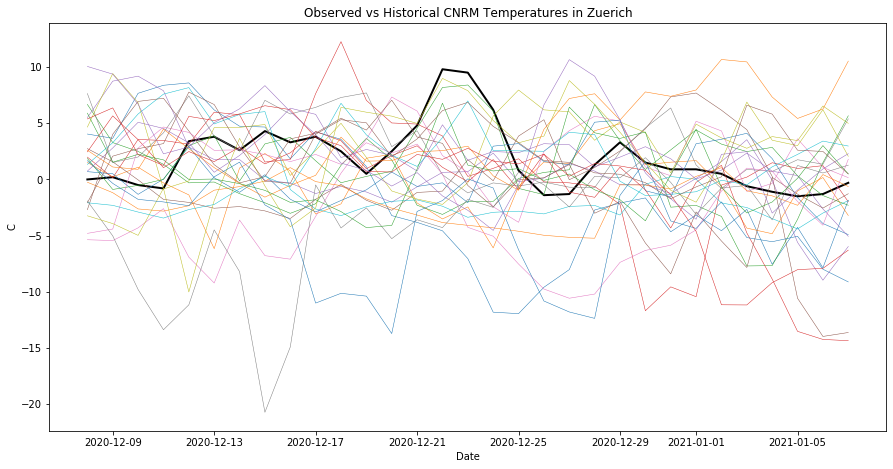

In [306]:
fig = plt.figure(figsize = [15,7.5])
plt.plot(OBS_recent, linewidth = 2, color = "k")
plt.title("Observed vs Historical CNRM Temperatures in Zuerich")
plt.ylabel("C")
plt.xlabel("Date")
for i in range(0,26):
    plt.plot(OBS_recent.index, hist_CNRM[i], linewidth = 0.5)

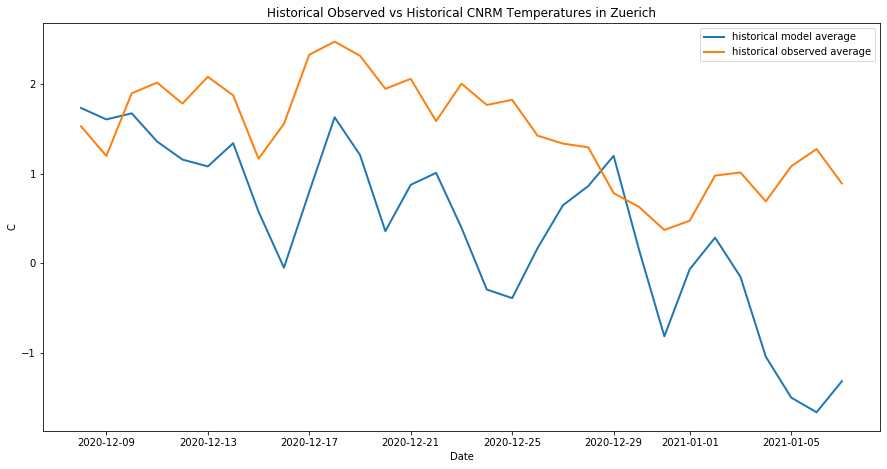

In [166]:
fig = plt.figure(figsize = [15,7.5])
#plt.plot(OBS_recent, linewidth = 2, color = "k", label='this year observed')
plt.title("Historical Observed vs Historical CNRM Temperatures in Zuerich")
plt.ylabel("C")
plt.xlabel("Date")
plt.plot(OBS_recent.index, hist_CNRM_mean, linewidth = 2, label='historical model average')
plt.plot(OBS_recent.index, hist_OBS_mean, linewidth = 2, label='historical observed average')


plt.legend()

Repeat for ICHEC:

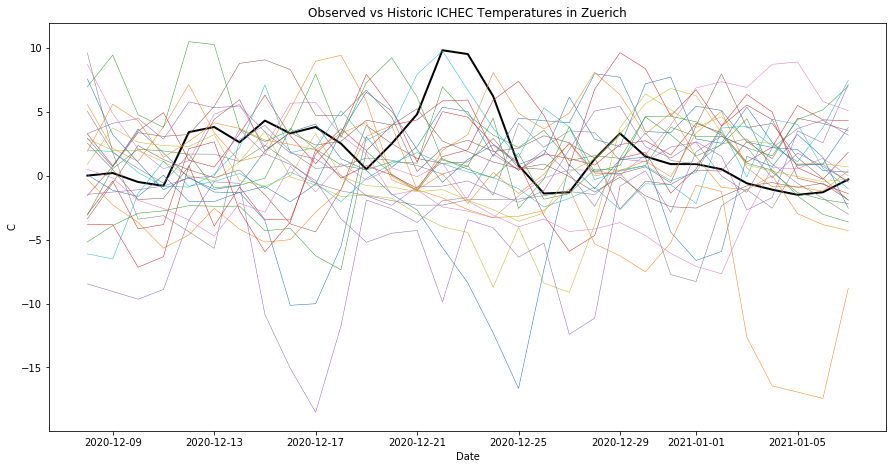

In [160]:
fig = plt.figure(figsize = [15,7.5])
plt.plot(OBS_recent, linewidth = 2, color = "k")
plt.title("Historical Observed vs Historical ICHEC Temperatures in Zuerich")
plt.ylabel("C")
plt.xlabel("Date")
for i in range(0,26):
    plt.plot(OBS_recent.index, hist_ICHEC[i], linewidth = 0.5)

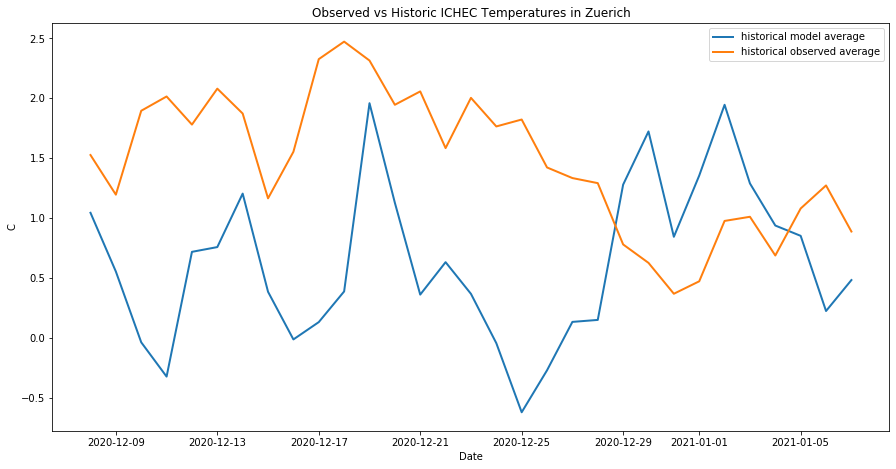

In [164]:
fig = plt.figure(figsize = [15,7.5])
#plt.plot(OBS_recent, linewidth = 2, color = "k", label='this year observed')
plt.title("Observed Historical vs Historical ICHEC Temperatures in Zuerich")
plt.ylabel("C")
plt.xlabel("Date")
plt.plot(OBS_recent.index, hist_ICHEC_mean, linewidth = 2, label='historical model average')
plt.plot(OBS_recent.index, hist_OBS_mean, linewidth = 2, label='historical observed average')

plt.legend()

Compare monthly averages for historical projected and observed:



In [307]:
hist

,hist_CNRM,hist_ICHEC,OBS
1979-01-01,-2.849030,-4.780243,-8.1
1979-01-02,-2.324524,-6.472870,-9.7
1979-01-03,-0.451508,-3.491028,-5.7
1979-01-04,-3.768860,-2.199768,-8.0
1979-01-05,-4.093964,-8.431519,-10.0
...,...,...,...
2005-12-27,1.201416,5.600067,-2.9
2005-12-28,3.729340,1.881439,-6.0
2005-12-29,5.687958,3.513062,-5.5
2005-12-30,1.647583,3.973846,-6.7


In [312]:
months = np.arange(1,13)

monthly_means_hist = np.zeros((12,3))

for i in months:
    monthly_means_hist[i-1] = hist[hist.index.month==i].mean(axis=0)
hist.columns[0]

'hist_CNRM'

In [313]:
df_monthly_means_hist = pd.DataFrame({hist.columns[0]: monthly_means[:,0],
                                 hist.columns[1]: monthly_means[:,1],
                                 hist.columns[2]: monthly_means[:,2],
                                }, index=months )

In [331]:
# biases

(df_monthly_means_hist['hist_CNRM']-df_monthly_means_hist['OBS']).mean()
(df_monthly_means_hist['hist_ICHEC']-df_monthly_means_hist['OBS']).mean()

-1.5284243325392406

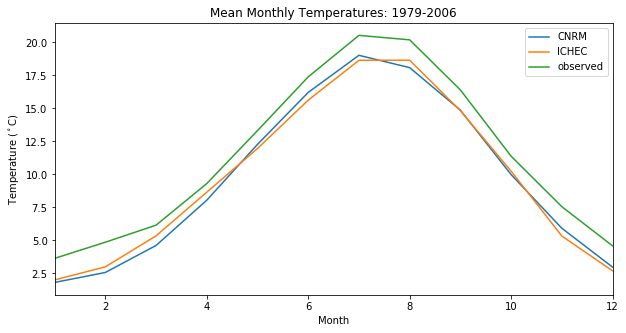

In [327]:
labels_hist = ['CNRM','ICHEC','observed']

fig = plt.figure(figsize=(10,5))

for i in range(3):
    df_monthly_means_hist[hist.columns[i]].plot(label=labels_hist[i])
plt.legend()
plt.title('Mean Monthly Temperatures: 1979-2006')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.savefig('..\\figures\\histmonths')

---
#### Deeper stats

In [356]:
hist

,hist_CNRM,hist_ICHEC,OBS
1979-01-01,-2.849030,-4.780243,-8.1
1979-01-02,-2.324524,-6.472870,-9.7
1979-01-03,-0.451508,-3.491028,-5.7
1979-01-04,-3.768860,-2.199768,-8.0
1979-01-05,-4.093964,-8.431519,-10.0
...,...,...,...
2005-12-27,1.201416,5.600067,-2.9
2005-12-28,3.729340,1.881439,-6.0
2005-12-29,5.687958,3.513062,-5.5
2005-12-30,1.647583,3.973846,-6.7


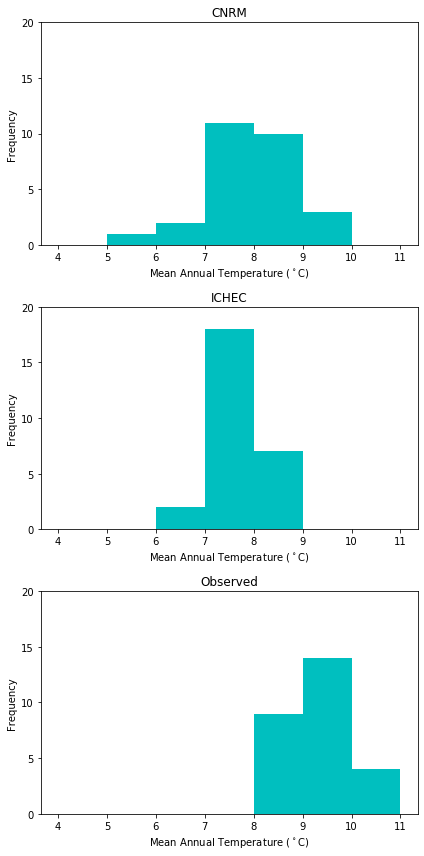

In [398]:
# Histogram with average annual temperatures for each of the 3:
years = np.unique(np.array(hist.index.year))

ann_means = np.zeros((len(years),3))

for i in range(len(years)):
    year = years[i]
    ann_means[i] = hist[hist.index.year==year].mean(axis=0)
    
# histogram
yticks = np.arange(0,21,5)

bins = np.arange(4,12)
#axs[0].hist(x, bins=n_bins
fig, axs = plt.subplots(3, 1, figsize=(6,12), tight_layout=True)
axs[0].hist(ann_means[:,0], bins=bins, color='c', label='CNRM')
axs[0].set_ylim(0,20)
axs[0].set_title('CNRM')
axs[0].set_xlabel('Mean Annual Temperature ($^\circ$C)')
axs[0].set_ylabel('Frequency')
axs[0].set_yticks(yticks)

axs[1].hist(ann_means[:,1], bins=bins, color='c', label='ICHEC')
axs[1].set_ylim(0,20)
axs[1].set_title('ICHEC')
axs[1].set_xlabel('Mean Annual Temperature ($^\circ$C)')
axs[1].set_ylabel('Frequency')
axs[1].set_yticks(yticks)

axs[2].hist(ann_means[:,2], bins=bins, color='c', label='Observed')
axs[2].set_ylim(0,20)
axs[2].set_title('Observed')
axs[2].set_xlabel('Mean Annual Temperature ($^\circ$C)')
axs[2].set_ylabel('Frequency')
axs[2].set_yticks(yticks)

plt.savefig('..\\figures\\histyrs')

In [357]:
# overall means:

hist.mean(axis=0)

hist_CNRM     7.955193
hist_ICHEC    7.711485
OBS           9.283573
dtype: float64

In [360]:
# standard deviation
hist.std(axis=0)

hist_CNRM     7.470887
hist_ICHEC    6.763951
OBS           7.447948
dtype: float64

In [364]:
#max
hist.max(axis=0)

hist_CNRM     26.954926
hist_ICHEC    25.788208
OBS           27.400000
dtype: float64

In [365]:
#min
hist.min(axis=0)

hist_CNRM    -20.709595
hist_ICHEC   -19.331604
OBS          -18.100000
dtype: float64

In [366]:
#skewness
hist.skew(axis=0)

hist_CNRM    -0.211305
hist_ICHEC   -0.177805
OBS          -0.111888
dtype: float64

---

### (c) Future Climate Projections

In [167]:
# proj contains all projection data

proj

,rcp45_CNRM,rcp45_ICHEC,rcp85_CNRM,rcp85_ICHEC
2040-01-01,2.411713,2.168121,-3.616699,4.021271
2040-01-02,0.712799,2.154449,-2.104218,7.503174
2040-01-03,1.973938,5.453278,1.143799,1.911102
2040-01-04,0.174316,4.970947,1.920441,0.912109
2040-01-05,-0.119354,3.175293,0.900146,3.911011
...,...,...,...,...
2100-12-27,1.260529,-5.344025,-0.893524,6.652130
2100-12-28,1.031219,-2.929596,-1.589813,5.579071
2100-12-29,3.416168,-1.128693,-1.659821,4.517944
2100-12-30,8.535309,-0.460785,-1.606476,3.733124


We'll consider the final 30 years of the projected data, from 2070-01-01 to 2100-12-31.

We'll extract the dates in question for each year, average the temperatures over the 30 years for each date, and compare this to the historical observed data.

We'll do this for each of the CNRM and ICHEC models, and both the RCP4.5 and RCP8.5 scenarios.

In [170]:
proj_30 = proj['2070':]

In [177]:
start_dates_proj = [str(20701208 + i*10**4) for i in range(30)]
end_dates_proj = [str(20710107 + i*10**4) for i in range(30)]

rcp45_CNRM = np.zeros((30,31))
rcp85_CNRM = np.zeros((30,31))

rcp45_ICHEC = np.zeros((30,31))
rcp85_ICHEC = np.zeros((30,31))


for i in range(len(start_dates)):
    rcp45_CNRM[i] = proj_30[start_dates_proj[i]:end_dates_proj[i]][proj_30.columns[0]]
    rcp45_ICHEC[i] = proj_30[start_dates_proj[i]:end_dates_proj[i]][proj_30.columns[1]]
    rcp85_CNRM[i] = proj_30[start_dates_proj[i]:end_dates_proj[i]][proj_30.columns[2]]
    rcp85_ICHEC[i] = proj_30[start_dates_proj[i]:end_dates_proj[i]][proj_30.columns[3]]

#OBS_recent = DAT['20201208':'20210107']['TG']*0.1

rcp45_CNRM_mean = rcp45_CNRM.mean(axis=0)
rcp85_CNRM_mean = rcp85_CNRM.mean(axis=0)

rcp45_ICHEC_mean = rcp45_ICHEC.mean(axis=0)
rcp85_ICHEC_mean = rcp85_ICHEC.mean(axis=0)


In [189]:
hist_OBS_mean

array([1.52692308, 1.19615385, 1.89615385, 2.01538462, 1.78076923,
       2.08076923, 1.87307692, 1.16538462, 1.55384615, 2.32692308,
       2.47307692, 2.31538462, 1.94615385, 2.05769231, 1.58461538,
       2.00384615, 1.76538462, 1.82307692, 1.42307692, 1.33461538,
       1.29230769, 0.78076923, 0.62692308, 0.36923077, 0.47307692,
       0.97692308, 1.01153846, 0.68846154, 1.08076923, 1.27307692,
       0.88846154])

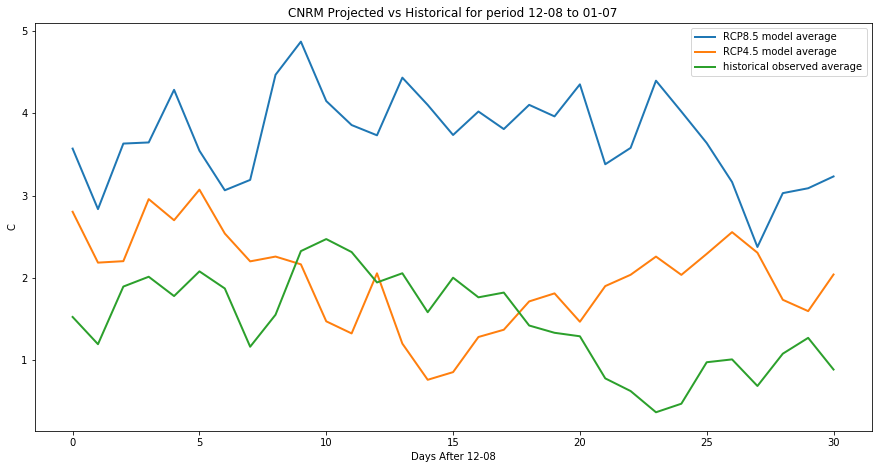

In [343]:
fig = plt.figure(figsize = [15,7.5])
#plt.plot(OBS_recent, linewidth = 2, color = "k", label='this year observed')
plt.title("CNRM Projected vs Historical for period 12-08 to 01-07")
plt.ylabel("C")
plt.xlabel("Days After 12-08")
plt.plot(rcp85_CNRM_mean, linewidth = 2, label='RCP8.5 model average')
plt.plot(rcp45_CNRM_mean, linewidth = 2, label='RCP4.5 model average')
plt.plot(hist_OBS_mean, linewidth = 2, label='historical observed average')

plt.legend()

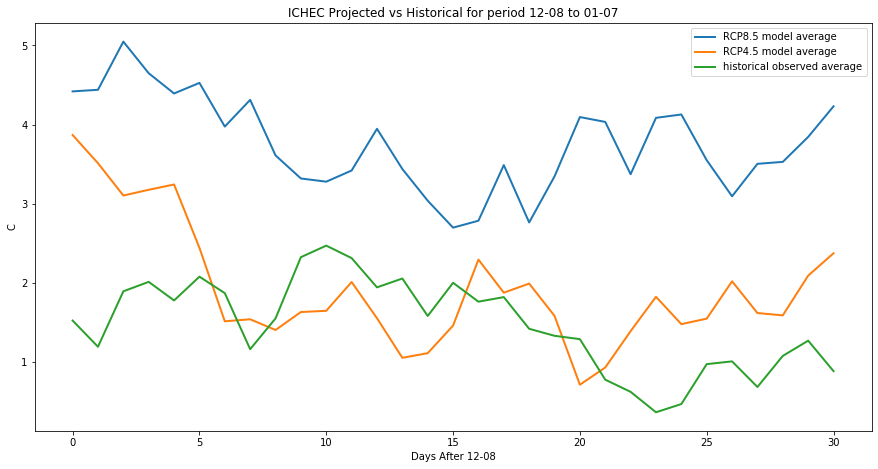

In [192]:
fig = plt.figure(figsize = [15,7.5])
#plt.plot(OBS_recent, linewidth = 2, color = "k", label='this year observed')
plt.title("ICHEC Projected vs Historical for period 12-08 to 01-07")
plt.ylabel("C")
plt.xlabel("Days After 12-08")
plt.plot(rcp85_ICHEC_mean, linewidth = 2, label='RCP8.5 model average')
plt.plot(rcp45_ICHEC_mean, linewidth = 2, label='RCP4.5 model average')
plt.plot(hist_OBS_mean, linewidth = 2, label='historical observed average')

plt.legend()

Next, do more comparisons between the projections and the historical data. 

e.g. monthly averages

Monthly averages: Get averages for each month for each model, and for the historical observed data

### Monthly Means

First, make a dataframe with monthly averages for each model projection, including the monthly averages of the historical data.

Then, combine the two models or each scenario, weighted equally.

Do this first for the actual temperatures, before subtracting the historical data to get the projected temperature changes by month. 

In [283]:
months = np.arange(1,13)

monthly_means = np.zeros((12,4))

for i in months:
    monthly_means[i-1] = proj_30[proj_30.index.month==i].mean(axis=0)

In [284]:
df_monthly_means = pd.DataFrame({proj_names[0]: monthly_means[:,0],
                                 proj_names[1]: monthly_means[:,1],
                                 proj_names[2]: monthly_means[:,2],
                                 proj_names[3]: monthly_means[:,3]
                                }, index=months )

In [285]:
proj = pd.DataFrame({proj_names[0]: TAS_proj_D[0],
                    proj_names[1]: TAS_proj_D[1],
                    proj_names[2]: TAS_proj_D[2],
                    proj_names[3]: TAS_proj_D[3]
                    }, index=pd.to_datetime(TAS_proj_D.time.values) )

In [286]:
# Now include the monthly historical means 
hist_monthly_means = np.zeros(12)
for i in months:
    hist_monthly_means[i-1] = hist[hist.index.month==i]['OBS'].mean(axis=0)

In [287]:
df_monthly_means['hist'] = hist_monthly_means
df_monthly_means

,rcp45_CNRM,rcp45_ICHEC,rcp85_CNRM,rcp85_ICHEC,hist
1,1.808630,1.994436,3.633145,4.063924,0.237037
2,2.564952,2.991405,4.857117,3.958584,1.331848
3,4.609014,5.337751,6.147733,6.666291,5.437157
4,8.038929,8.645592,9.297851,10.294788,8.340494
5,12.270893,11.960414,13.313203,13.799253,13.073596
6,16.206852,15.620491,17.385435,17.607832,16.202346
7,19.018934,18.641008,20.531443,20.923403,18.291398
8,18.085474,18.648548,20.191139,21.680086,18.119833
9,14.862699,14.824568,16.395792,17.299305,14.185802
10,9.980751,10.239372,11.374706,11.582983,9.847551


### Present the models averaged:

In [332]:
df_monthly_means_combined = df_monthly_means[['hist']]

In [290]:
df_monthly_means_combined['rcp45'] = np.array(df_monthly_means[['rcp45_CNRM', 'rcp45_ICHEC']].mean(axis=1))
df_monthly_means_combined['rcp85'] = np.array(df_monthly_means[['rcp85_CNRM', 'rcp85_ICHEC']].mean(axis=1))

df_monthly_means_combined

C:\Users\Ronan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ronan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hist,rcp45,rcp85
1,0.237037,1.901533,3.848535
2,1.331848,2.778179,4.407850
3,5.437157,4.973382,6.407012
4,8.340494,8.342260,9.796319
5,13.073596,12.115654,13.556228
6,16.202346,15.913671,17.496634
7,18.291398,18.829971,20.727423
8,18.119833,18.367011,20.935613
9,14.185802,14.843633,16.847548
10,9.847551,10.110062,11.478845


In [292]:
# projected monthly temperature changes with respect to observed period 1979-2006

df_monthly_means_changes = df_monthly_means.sub(df_monthly_means['hist'], axis=0).drop('hist', axis=1)

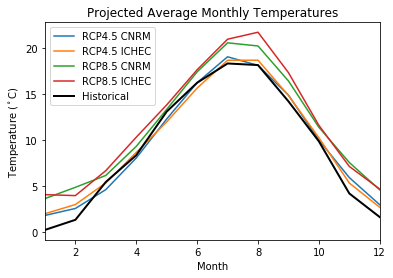

In [353]:
df_monthly_means

labelst=['RCP4.5 CNRM', 'RCP4.5 ICHEC', 'RCP8.5 CNRM', 'RCP8.5 ICHEC', 'Historical' ]

fig = plt.plot(figsize=(12,8))


for i in range(4):
    df_monthly_means.iloc[:,i].plot(label=labelst[i])
   
df_monthly_means['hist'].plot(color='k', linewidth=2, label='Historical')
plt.title('Projected Average Monthly Temperatures')
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Month')
plt.legend()

plt.savefig('..\\figures\\monthlyt')

### Temperature Changes

In [333]:
df_monthly_means_changes.shape

(12, 4)

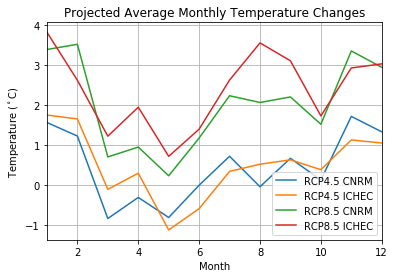

In [347]:
labelstc=['RCP4.5 CNRM', 'RCP4.5 ICHEC', 'RCP8.5 CNRM', 'RCP8.5 ICHEC' ]

fig = plt.plot(figsize=(12,8))


for i in range(4):
    df_monthly_means_changes.iloc[:,i].plot(label=labelstc[i])
    
plt.title('Projected Average Monthly Temperature Changes')
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Month')
plt.grid()
plt.legend()

plt.savefig('..\\figures\\monthlytc')

In [301]:
df_monthly_means_changes_combined = df_monthly_means_changes[['rcp45_CNRM']]

df_monthly_means_changes_combined['rcp45'] = np.array(df_monthly_means_changes[['rcp45_CNRM', 'rcp45_ICHEC']].mean(axis=1))
df_monthly_means_changes_combined['rcp85'] = np.array(df_monthly_means_changes[['rcp85_CNRM', 'rcp85_ICHEC']].mean(axis=1))

df_monthly_means_changes_combined = df_monthly_means_changes_combined.drop('rcp45_CNRM', axis=1)

df_monthly_means_changes_combined

C:\Users\Ronan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ronan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rcp45,rcp85
1,1.664496,3.611498
2,1.446331,3.076002
3,-0.463774,0.969856
4,0.001767,1.455826
5,-0.957943,0.482632
6,-0.288674,1.294288
7,0.538573,2.436025
8,0.247178,2.815780
9,0.657831,2.661746
10,0.262511,1.631294


### Annual Averages

In [245]:
# get overall yearly averages:
annual_mean_temperatures = df_monthly_means.mean(axis=0)
annual_mean_changes = df_monthly_means_changes.mean(axis=0)

In [400]:
np.round(annual_mean_temperatures,2)

rcp45_CNRM      9.69
rcp45_ICHEC     9.74
rcp85_CNRM     11.27
rcp85_ICHEC    11.64
hist            9.24
dtype: float64

In [401]:
np.round(annual_mean_changes,2)

rcp45_CNRM     0.45
rcp45_ICHEC    0.50
rcp85_CNRM     2.03
rcp85_ICHEC    2.40
dtype: float64

In [302]:
annual_mean_temperatures_combined = pd.DataFrame({'1979-2006': annual_mean_temperatures[4], 
                                                  'rcp45': annual_mean_temperatures[0:2].mean(),
                                                  'rcp85': annual_mean_temperatures[2:4].mean()}, index=[1])

annual_mean_changes_combined = pd.DataFrame({'rcp45': annual_mean_changes[0:2].mean(), 
                                             'rcp85': annual_mean_changes[2:4].mean()}, index=[1])


In [256]:
annual_mean_temperatures[0:2].mean()
annual_mean_temperatures[2:4].mean()

11.455185582240421

Models are of equal importance, so present averages over the two:

In [257]:
annual_mean_temperatures_combined

,1979-2006,rcp45,rcp85
1,9.240537,9.718543,11.455186


In [303]:
annual_mean_changes_combined

,rcp45,rcp85
1,0.478007,2.214649
